# **First steps**

In [ ]:
## For Colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
BASE_FOLDER = '/content/drive/My Drive/'

#### **We import libraries**

In [ ]:
# Import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import random
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#### **Definition of training functions**

In [ ]:
# Training function without applying data augmentation; the parameter n_epochs is added to select the number of epochs before training the model, along with the batch parameter to choose the batch size.
def train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER,n_epochs,batch,learn_rate=0.0005):

  # Model summary
  pre_trained_model.summary()

  # Compile the model
  print("[INFO]: Compilando el modelo...")
  pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate), metrics=["accuracy"])

  # Training the network
  print("[INFO]: Entrenando la red...")
  H_pre = pre_trained_model.fit(x_train, y_train, batch_size=batch, epochs=n_epochs, validation_split=0.2) # Destinamos 20% a validación
  # Save the model to Drive
  # We save the model using Keras' model.save function

  pre_trained_model.save(BASE_FOLDER+"deepCNN_Cifar_100_pretrained.h5")

  # Model evaluation
  print("[INFO]: Evaluando el modelo...")
  # We make the prediction (using the same batch_size value as in training)
  predictions = pre_trained_model.predict(x_test, batch_size=batch)
  # We generate the report for the test
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
  
  # Graphics
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, n_epochs), H_pre.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n_epochs), H_pre.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n_epochs), H_pre.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n_epochs), H_pre.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()


# Training function applying data augmentation
def train_with_datagen(x_train, y_train, x_test, y_test, model_aug, BASE_FOLDER, data_aug_factor, train_datagen,n_epochs,batch,learn_rate=0.0005, epochs=20):
  # Model summary
  model.summary()

  # Training the solution with data augmentation
  train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch,
    subset= 'training'
    )

  validation_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch,
    subset= 'validation'
  )

  # Compile the model
  print("[INFO]: Compilando el modelo...")
  model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate), metrics=["accuracy"])

  # Training the network
  print("[INFO]: Entrenando la red...")

  H_aug = model.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//128,
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//128,
            workers = data_aug_factor,
            epochs = n_epochs)

  # Save the model to Drive
  # We save the model using Keras' model.save function
  drive.mount('/content/drive')
  model.save(BASE_FOLDER+"deepCNN_CIFAR100_pretrained.h5")

  # Model evaluation
  print("[INFO]: Evaluando el modelo...")
  # We make the prediction (using the same batch_size value as in training).
  predictions = model.predict(x_test, batch_size=batch)
  # We generate the report for the test.
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

  # Graphics
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, n_epochs), H_aug.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n_epochs), H_aug.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n_epochs), H_aug.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n_epochs), H_aug.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()


#### **Loading the dataset**

In [ ]:
# Download the CIFAR100 dataset from Keras.

from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 2s 0us/step


#### **It is necessary to resample the images from shape (32, 32, 3) to (128, 128, 3). After that, we scale the array to the range [0, 1]**

In [ ]:
import cv2
import numpy as np

# Function to resize and normalize images
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        # Resize image using bicubic interpolation
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resizing x_train and x_test to 128x128
x_train = resize_images(x_train, (128, 128))
x_test = resize_images(x_test, (128, 128))

# Normalize images to the range [0, 1] if necessary
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


#### **Inspecting the dataset**


(50000, 128, 128, 3)
10000


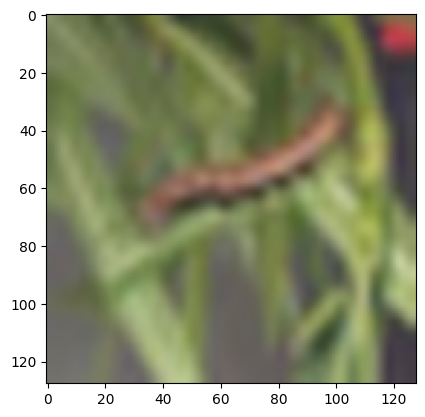

La clase es [19]


In [ ]:
print(x_train.shape)
print(len(y_test))

# show image
i = 9144
imgplot = plt.imshow(x_train[i])
plt.show()
print("La clase es %s" %(y_test[i]))

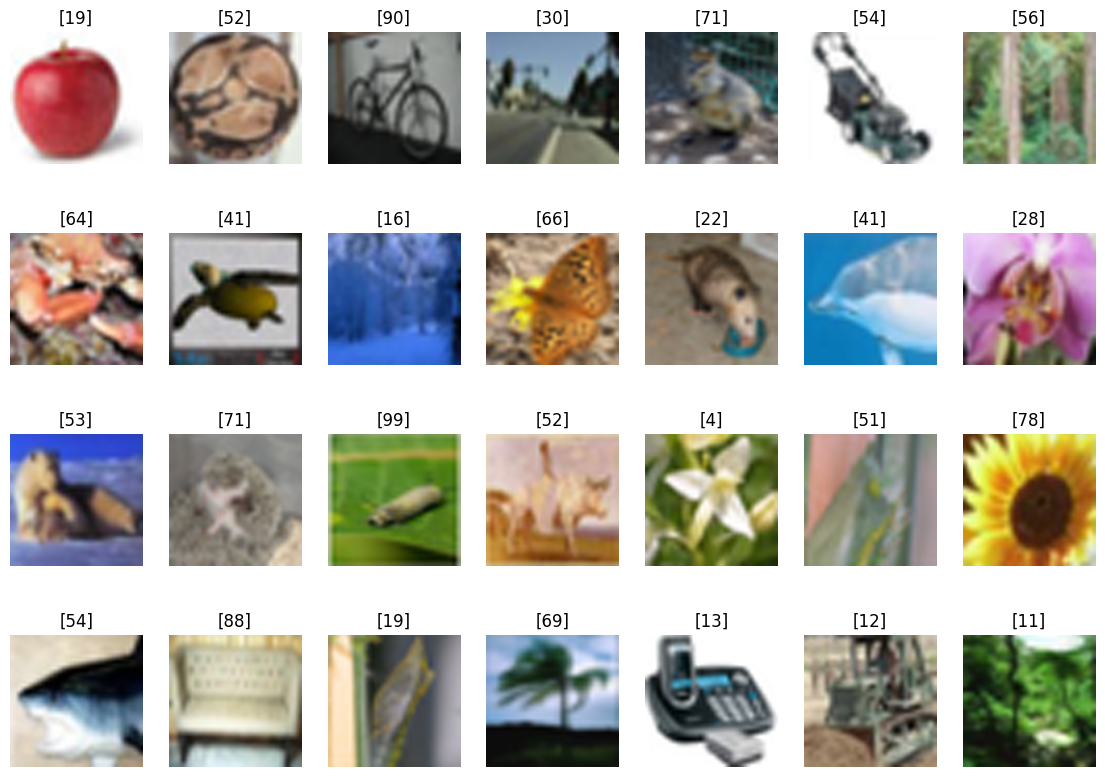

In [ ]:
fig = plt.figure(figsize=(14,10))

for n, i in enumerate(random.sample(range(1,len(y_test)), 28)):
    fig.add_subplot(4, 7, n+1)
    img = x_train[i]
    plt.imshow(img)
    plt.title(y_test[i])
    plt.axis('off')

According to the official page (http://www.vision.caltech.edu/Image_Datasets/Caltech101/), there is a range of 40 to 800 images per class, with most classes having 50 images.

Let's verify this...

#### **Preparing the dataset by converting the labels to One-Hot Encoding (OHE)**

In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Let's check if the data is normalized
print(x_train.max())
print(x_train.min())

1.0
0.0


# **STRATEGY 1: Pre-trained Network**

To obtain the final solution, the following steps are followed:

1. **TRANSFER LEARNING** is applied to 3 pre-trained networks: MobileNetV2, Xception, and DenseNet121. We will choose DenseNet121 for **FINE TUNING**, as it provides the best accuracy (67% at 20 epochs), and it has the fewest trainable parameters, making it easier to manipulate. On the other hand, Xception was only trained for 10 epochs due to the difficulty of training the model in terms of time.
2. **FINE TUNING** is applied.
3. The structure of the **TOP MODEL** (convolutional layers and number of neurons) will be modified.
4. Different regularization techniques (weight regularization, dropout, and batch normalization) will be evaluated.
5. **DATA AUGMENTATION** is applied.


## **1. TRANSFER LEARNING WITH DIFFERENT NETWORKS**

### **1.1 Using the MobileNetV2 Network**


#### **1.1.1. Preparing the dataset for the MobileNetV2 network**

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

# The data is normalized, and preprocess_input requires a range of [0, 255]
# We multiply by *255
x_train, x_test = x_train * 255.0, x_test * 255.0

# The data is normalized in the same way as it was during the training of ImageNet with the MobileNetV2 network
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

#### **1.1.2. Loading the CNN topology (base model)**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

#### **1.1.3. Creating the top model and freezing **ALL convolutional layers** (TRANSFER LEARNING) + Training**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 20480)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               10486272  
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 12795556 (48.81 MB)
Trainable params: 10537572 (40.20 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Model: "sequential_2"
____________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 21s 262ms/step
               precision    recall  f1-score   support

        apple       0.74      0.88      0.80       100
aquarium_fish       0.78      0.72      0.75       100
         baby       0.39      0.58      0.47       100
         bear       0.50      0.45      0.47       100
       beaver       0.30      0.49      0.37       100
          bed       0.69      0.57      0.62       100
          bee       0.59      0.70      0.64       100
       beetle       0.78      0.51      0.62       100
      bicycle       0.82      0.74      0.78       100
       bottle       0.82      0.79      0.81       100
         bowl       0.46      0.34      0.39       100
          boy       0.33      0.39      0.36       100
       bridge       0.60      0.75      0.66       100
          bus       0.67      0.32      0.43       100
    butterfly       0.58      0.67      0.62       100
        camel       0.51      0.

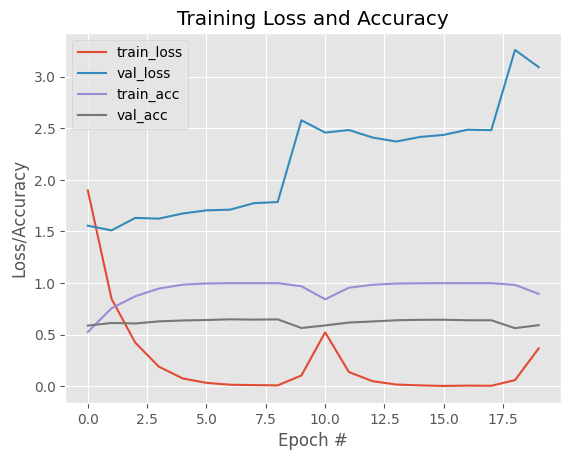

In [ ]:
# Connecting it to a new dense layer
base_model.trainable = False # Avoid modifying the weights in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

pre_trained_model.summary()


# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 20, batch = 128)

##### As a conclusion for this network, we have an accuracy of around 60% with 40MB of trainable parameters. On the other hand, we can see how the val_loss increases significantly as the epochs progress, which indicates a sign of overfitting.

### **1.2. Using the Xception network**


#### **1.2.1. Preparing the dataset for the Xception network**

#### We reload the images to later apply the preprocess_input for this particular pre-trained network.

In [ ]:
# We download our image set again.

from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 45s 0us/step


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Checking data normalization
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
import cv2
import numpy as np

# Function to resize images
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        # Resize image using bicubic interpolation.
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize x_train and x_test to 128x128
x_train = resize_images(x_train, (128, 128))
x_test = resize_images(x_test, (128, 128))

# Normalize images to the range [0, 1] if necessary
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input

# The data is normalized, and `preprocess_input` requires a range of [0, 255]  
# We multiply by *255

x_train, x_test = x_train * 255.0, x_test * 255.0

# The data is normalized in the same way as it was during the training of ImageNet with the Xception network
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

#### **1.2.2. Loading the CNN topology (base model)**

In [ ]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 121, 121, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 121, 121, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 121, 121, 32)         0         ['block1_conv1_bn[0][0]

#### **1.2.3. Creating the top model and freezing **ALL convolutional layers** (TRANSFER LEARNING) + Training**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 37690508 (143.78 MB)
Trainable params: 16829028 (64.20 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape            

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 51s 630ms/step
               precision    recall  f1-score   support

        apple       0.73      0.91      0.81       100
aquarium_fish       0.56      0.71      0.63       100
         baby       0.45      0.40      0.42       100
         bear       0.64      0.39      0.48       100
       beaver       0.59      0.30      0.40       100
          bed       0.72      0.41      0.52       100
          bee       0.54      0.58      0.56       100
       beetle       0.56      0.74      0.64       100
      bicycle       0.72      0.82      0.77       100
       bottle       0.74      0.83      0.78       100
         bowl       0.49      0.50      0.50       100
          boy       0.33      0.39      0.36       100
       bridge       0.84      0.51      0.63       100
          bus       0.47      0.47      0.47       100
    butterfly       0.58      0.42      0.49       100
        camel       0.81      0.

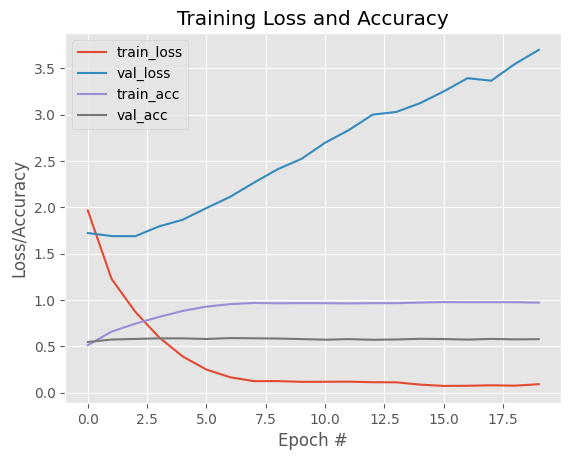

In [ ]:
# Connecting it to a new dense part
base_model.trainable = False # Avoid modifying the weights in the convolutional part -> TRANSFER LEARNING.
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 20, batch = 128)

#### As a conclusion for the pre-trained Xception network, we find that it is much slower to train since the training parameters are over 64MB. It achieves only 58% accuracy. Additionally, overfitting is clearly evident.

### **1.3. Using the network DenseNet121**


##### We reload the images to apply the preprocess_input for DenseNet121.

#### **1.3.1. Preparing the dataset for the DenseNet121 network**

In [ ]:
# Loading again the data

from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# We check if the data is normalized
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
import cv2
import numpy as np

# Function to resiza images
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        # Resize image using bicubic interpolation.
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize x_train and x_test to 128x128
x_train = resize_images(x_train, (128, 128))
x_test = resize_images(x_test, (128, 128))

# Normalize images to the range [0, 1] if necessary
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

# The data is normalized, and preprocess_input requires a range of [0, 255].  
# We multiply by *255.
x_train, x_test = x_train * 255.0, x_test * 255.0

# The data is normalized in the same way as it was during the training of ImageNet with the ResNet152V2 network
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

#### **1.3.2. Loading the CNN topology (base model)**

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 134, 134, 3)          0         ['input_6[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']

#### **1.3.3. Creating the top model and freezing **ALL convolutional layers** (TRANSFER LEARNING) + Training**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 dense_14 (Dense)            (None, 512)               8389120   
                                                                 
 dense_15 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15477924 (59.04 MB)
Trainable params: 8440420 (32.20 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 65s 799ms/step
               precision    recall  f1-score   support

        apple       0.93      0.82      0.87       100
aquarium_fish       0.82      0.79      0.81       100
         baby       0.63      0.59      0.61       100
         bear       0.78      0.53      0.63       100
       beaver       0.61      0.35      0.45       100
          bed       0.73      0.71      0.72       100
          bee       0.68      0.69      0.68       100
       beetle       0.71      0.70      0.71       100
      bicycle       0.89      0.81      0.85       100
       bottle       0.90      0.77      0.83       100
         bowl       0.47      0.65      0.55       100
          boy       0.49      0.42      0.45       100
       bridge       0.67      0.72      0.69       100
          bus       0.59      0.67      0.63       100
    butterfly       0.57      0.69      0.62       100
        camel       0.66      0.

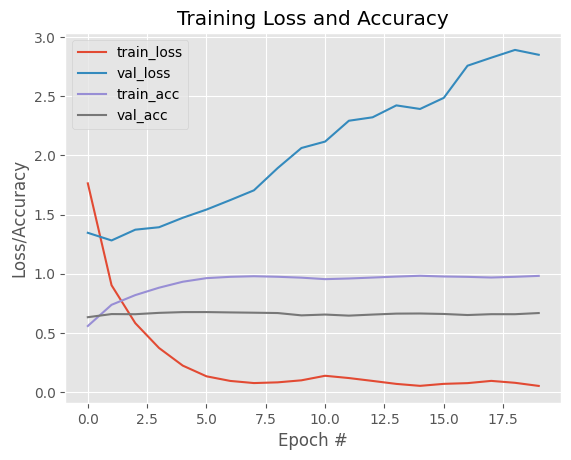

In [ ]:
# Connecting it to a new dense part
base_model.trainable = False # Avoid modifying the weights in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 20, batch = 128)

##### In the DenseNet121 network, with 32MB of trainable parameters, we achieve an accuracy of 67%. Although there is still overfitting, it is the network that provides the best results.

### **1.4. Analysis of Results**

We choose the pre-trained DenseNet121 network for Fine Tuning as it provides better accuracy with fewer trainable parameters. Additionally, the overfitting is similar to the other networks.

## **2. FINE TUNING** (slight improvement.)




### **2.1. We freeze 15/16 convolutional blocks**

In [ ]:
# We load the images again
# We load ndarrays

from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# We check if the data is normalized
print(x_train.max())
print(x_train.min())

255
0


#### **For this case we resample to 224,224, to see if there is an improvement.**

In [ ]:
import cv2
import numpy as np

# Function to resize images
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        # Resize image using bicubic interpolation.
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize x_train and x_test to 128x128
x_train = resize_images(x_train, (128, 128))
x_test = resize_images(x_test, (128, 128))

# Normalize images to the range [0, 1] if necessary
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

# The data is normalized and preprocess_input requires a range [0, 255]
# Multiply *255
x_train, x_test = x_train * 255.0, x_test * 255.0

# Normalize the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

Capa input_3 congelada...
Capa zero_padding2d_4 congelada...
Capa conv1/conv congelada...
Capa conv1/bn congelada...
Capa conv1/relu congelada...
Capa zero_padding2d_5 congelada...
Capa pool1 congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_0_relu congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_concat congelada...
Capa conv2_block2_0_bn congelada...
Capa conv2_block2_0_relu congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_concat congelada...
Capa conv2_block3_0_bn congelada...
Capa conv2_block3_0_relu congelada...
Capa conv2_block3_1_conv congelada...
Capa conv2_block3_1_bn congelada...
Capa conv2_block3_1_relu congelada...
Capa conv2_block3_2_conv congelada...
Capa conv2_block3_concat congelada...
Capa conv

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 214s 3s/step
               precision    recall  f1-score   support

        apple       0.93      0.84      0.88       100
aquarium_fish       0.79      0.79      0.79       100
         baby       0.45      0.68      0.54       100
         bear       0.91      0.30      0.45       100
       beaver       0.39      0.57      0.46       100
          bed       0.75      0.58      0.66       100
          bee       0.85      0.73      0.78       100
       beetle       0.78      0.64      0.70       100
      bicycle       0.83      0.87      0.85       100
       bottle       0.91      0.85      0.88       100
         bowl       0.57      0.62      0.59       100
          boy       0.57      0.33      0.42       100
       bridge       0.62      0.79      0.70       100
          bus       0.61      0.71      0.66       100
    butterfly       0.56      0.75      0.64       100
        camel       0.69      0.83

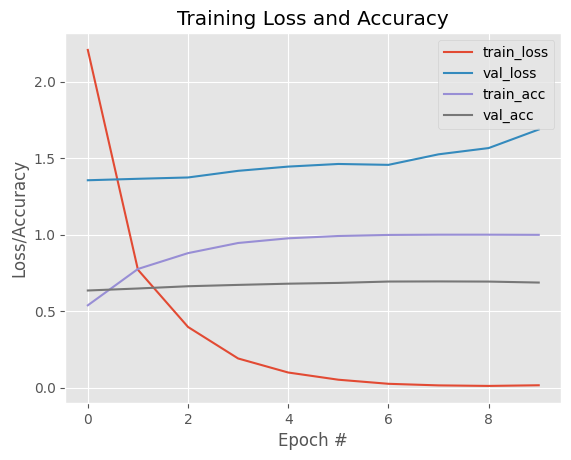

In [ ]:
from tensorflow.keras.applications import DenseNet121
# We reload the base_model
base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(224,224,3))

# Freeze the desired layers
for layer in base_model.layers:
  if layer.name == 'block_16_expand':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')


# We use the functional API
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(100, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

model.summary()

# Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 10, batch = 128)

There is a slight improvement reaching 68% accuracy but it still tends to overfitting. No more tests were done with fewer blocks because it is very expensive to run, it goes up to 25.74 million trainable parameters.

## **3. ADJUST STRUCTURE TOP MODEL** (no improvement)

#### **We put the images back to 128,128,3, since it is more comfortable to execute.**

In [ ]:
# We load images
# Load the ndarrays

from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# We check if data is normalized
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
import cv2
import numpy as np

# Function to resize images
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        # Resize image using bicubic interpolation.
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize x_train and x_test to 128x128
x_train = resize_images(x_train, (128, 128))
x_test = resize_images(x_test, (128, 128))

# Normalize images to the range [0, 1] if necessary
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

# The data is normalized and preprocess_input requires a range [0, 255]
# Multiply *255
x_train, x_test = x_train * 255.0, x_test * 255.0

# Normalize the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [ ]:
from tensorflow.keras.applications import DenseNet121
# Loading the base_model
base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))

29084464/29084464 [==============================] - 0s 0us/step


### **3.1. First attempt** (no improvement)

The structure of the Top Model is modified by modifying the hidden layer to 256 neurons. We see how the model has worse accuracy and there is still overfitting.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4194560   
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 11257764 (42.94 MB)
Trainable params: 4220260 (16.10 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 61s 754ms/step
               precision    recall  f1-score   support

        apple       0.89      0.83      0.86       100
aquarium_fish       0.78      0.80      0.79       100
         baby       0.58      0.57      0.58       100
         bear       0.54      0.63      0.58       100
       beaver       0.46      0.49      0.48       100
          bed       0.79      0.66      0.72       100
          bee       0.62      0.78      0.69       100
       beetle       0.72      0.65      0.68       100
      bicycle       0.89      0.86      0.87       100
       bottle       0.79      0.80      0.80       100
         bowl       0.48      0.62      0.54       100
          boy       0.49      0.43      0.46       100
       bridge       0.71      0.84      0.77       100
          bus       0.63      0.64      0.64       100
    butterfly       0.60      0.65      0.62       100
        camel       0.68      0.

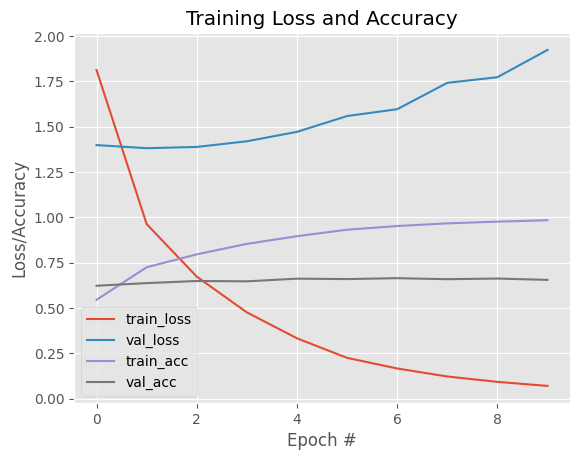

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 10, batch = 128)

### **3.2. Second attempt** (no improvement)

Two hidden layers of 1024 and 256 neurons are created in the Top Model, overfitting is controlled a little better but the accuracy does not increase and the model is much slower.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_7 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_8 (Dense)             (None, 256)               262400    
                                                                 
 dense_9 (Dense)             (None, 100)               25700     
                                                                 
Total params: 24103844 (91.95 MB)
Trainable params: 17066340 (65.10 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
Model: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 58s 710ms/step
               precision    recall  f1-score   support

        apple       0.93      0.78      0.85       100
aquarium_fish       0.67      0.85      0.75       100
         baby       0.46      0.72      0.56       100
         bear       0.67      0.53      0.59       100
       beaver       0.46      0.57      0.51       100
          bed       0.80      0.32      0.46       100
          bee       0.79      0.73      0.76       100
       beetle       0.56      0.82      0.67       100
      bicycle       0.96      0.77      0.86       100
       bottle       0.83      0.84      0.84       100
         bowl       0.55      0.55      0.55       100
          boy       0.43      0.32      0.37       100
       bridge       0.73      0.77      0.75       100
          bus       0.76      0.56      0.64       100
    butterfly       0.60      0.61      0.61       100
        camel       0.74      0.

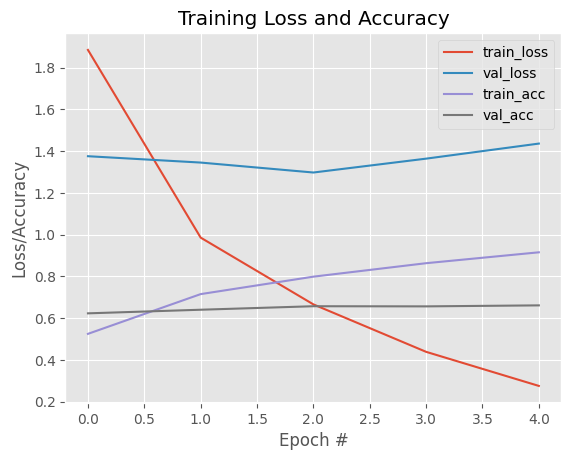

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(1024, activation='relu'))
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 5, batch = 128)

## **4. ADJUSTMENT OF REGULARIZATION PARAMETERS** (no improvement)

### **4.1. Weight regularization L2 (no improvement)**

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_10 (Flatten)        (None, 16384)             0         
                                                                 
 dense_20 (Dense)            (None, 512)               8389120   
                                                                 
 dense_21 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15477924 (59.04 MB)
Trainable params: 8440420 (32.20 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/10
313/313 [==============================] - 322s 1s/step - loss: 4.1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 66s 812ms/step
               precision    recall  f1-score   support

        apple       0.97      0.86      0.91       100
aquarium_fish       0.85      0.64      0.73       100
         baby       0.88      0.28      0.42       100
         bear       0.47      0.63      0.54       100
       beaver       0.38      0.58      0.46       100
          bed       0.74      0.45      0.56       100
          bee       0.41      0.87      0.56       100
       beetle       0.65      0.71      0.68       100
      bicycle       0.81      0.88      0.84       100
       bottle       0.71      0.89      0.79       100
         bowl       0.50      0.65      0.57       100
          boy       0.39      0.71      0.51       100
       bridge       0.73      0.58      0.65       100
          bus       0.52      0.67      0.59       100
    butterfly       0.84      0.53      0.65       100
        camel       0.72      0.

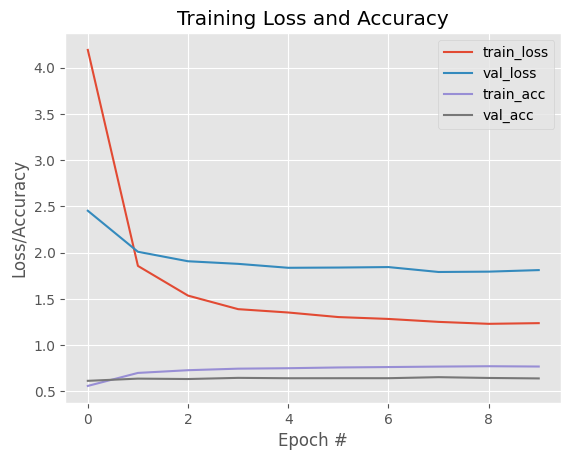

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 10, batch = 128)

It decreases in accuracy, although it does maintain the overfitting better.

### **4.2. Dropout (no improvement)**

Neither accuracy nor overfitting is improved.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_11 (Flatten)        (None, 16384)             0         
                                                                 
 dense_22 (Dense)            (None, 512)               8389120   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15477924 (59.04 MB)
Trainable params: 8440420 (32.20 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
[INFO]:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 65s 800ms/step
               precision    recall  f1-score   support

        apple       0.77      0.75      0.76       100
aquarium_fish       0.65      0.64      0.64       100
         baby       0.49      0.44      0.47       100
         bear       0.53      0.28      0.37       100
       beaver       0.19      0.23      0.21       100
          bed       0.43      0.68      0.53       100
          bee       0.46      0.54      0.50       100
       beetle       0.43      0.22      0.29       100
      bicycle       0.67      0.88      0.76       100
       bottle       0.93      0.74      0.82       100
         bowl       0.47      0.49      0.48       100
          boy       0.27      0.35      0.30       100
       bridge       0.59      0.62      0.60       100
          bus       0.55      0.53      0.54       100
    butterfly       0.38      0.39      0.39       100
        camel       0.67      0.

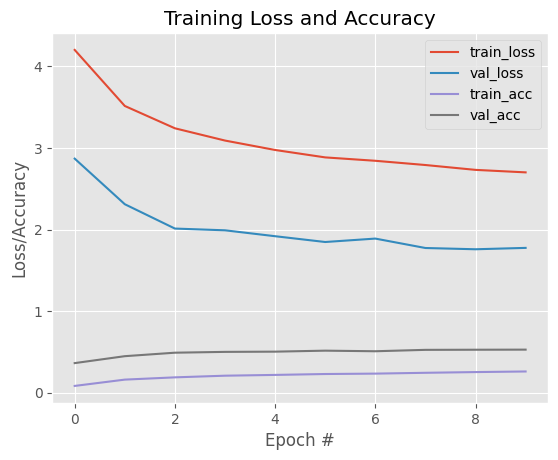

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(Dropout(0.75))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 10, batch = 128)

### **4.3. Batch normalization (no improvement)**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_16 (Dense)            (None, 512)               8389120   
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15479972 (59.05 MB)
Trainable params: 8441444 (32.20 MB)
Non-trainable params: 7038528 (26.85 MB)
________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 66s 815ms/step
               precision    recall  f1-score   support

        apple       0.91      0.83      0.87       100
aquarium_fish       0.75      0.82      0.78       100
         baby       0.67      0.47      0.55       100
         bear       0.84      0.31      0.45       100
       beaver       0.53      0.42      0.47       100
          bed       0.75      0.50      0.60       100
          bee       0.80      0.66      0.72       100
       beetle       0.70      0.76      0.73       100
      bicycle       0.63      0.89      0.74       100
       bottle       0.77      0.77      0.77       100
         bowl       0.38      0.63      0.48       100
          boy       0.60      0.27      0.37       100
       bridge       0.86      0.60      0.71       100
          bus       0.57      0.63      0.60       100
    butterfly       0.66      0.59      0.62       100
        camel       0.79      0.

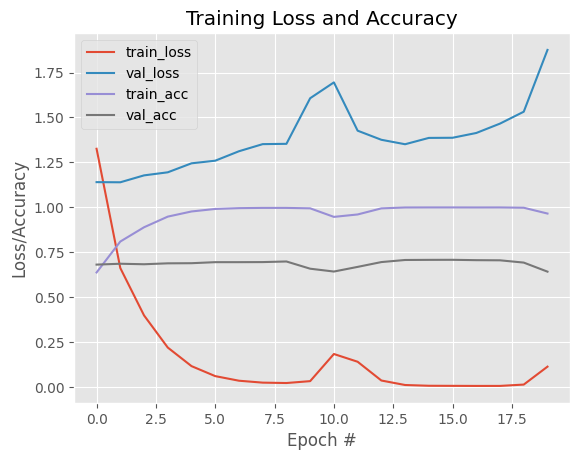

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 20, batch = 128)

Although the validation accuracy improves to almost 71%, the test accuracy is reduced to 64%. Overfitting is still noticeable.

### **4.4. Combination of the 3 regularization techniques (no improvement)**

The results are very uneven at different times, with no improvement in accuracy or overfitting.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               8389120   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 61s 749ms/step
               precision    recall  f1-score   support

        apple       0.97      0.76      0.85       100
aquarium_fish       0.81      0.81      0.81       100
         baby       0.62      0.55      0.59       100
         bear       0.83      0.43      0.57       100
       beaver       0.74      0.29      0.42       100
          bed       0.82      0.46      0.59       100
          bee       0.63      0.76      0.69       100
       beetle       0.59      0.71      0.64       100
      bicycle       0.80      0.90      0.85       100
       bottle       0.92      0.77      0.84       100
         bowl       0.54      0.63      0.58       100
          boy       0.55      0.26      0.35       100
       bridge       0.91      0.51      0.65       100
          bus       0.60      0.67      0.63       100
    butterfly       0.55      0.67      0.60       100
        camel       0.96      0.

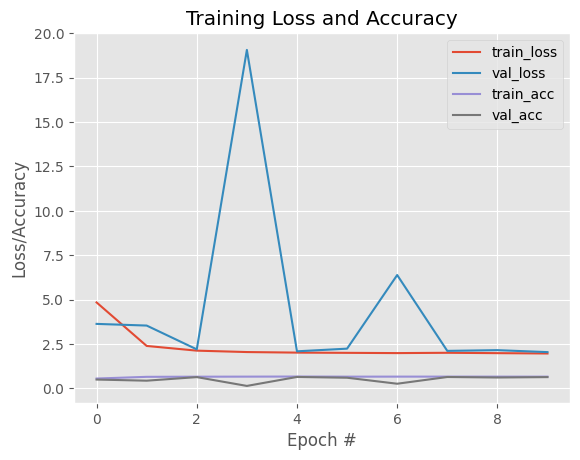

In [ ]:
# Connect it to new dense part
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.5))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Training the solution
train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, n_epochs = 10, batch = 128)

## **5. DATA AUGMENTATION (with improvement)**


### **5.1. Inspecting synthetically generated samples**

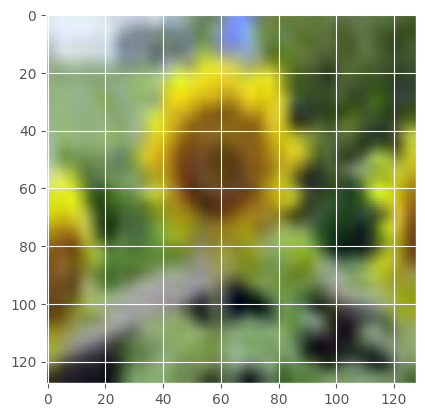

Label = sunflower


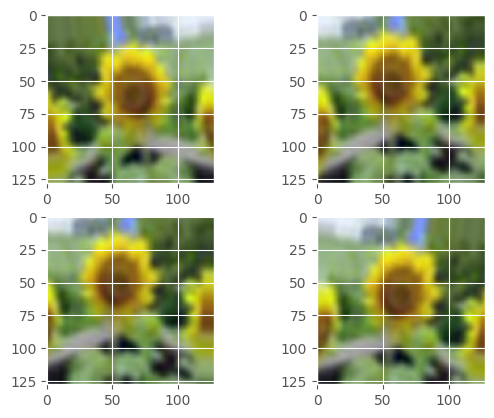

In [ ]:
sample = 12
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()
print('Label = {}'.format(list(labelNames)[y_train[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in train_datagen.flow(x_train[sample].reshape((1,128,128,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

### **5.2. Data Augmentation of a synthetic sample for each real sample (67% to 71% accuracy improvement)**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               8389120   
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15479972 (59.05 MB)
Trainable params: 8441444 (32.20 MB)
Non-trainable params: 7038528 (26.85 MB)
________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 56s 688ms/step
               precision    recall  f1-score   support

        apple       0.93      0.88      0.90       100
aquarium_fish       0.84      0.79      0.81       100
         baby       0.59      0.71      0.65       100
         bear       0.60      0.69      0.64       100
       beaver       0.61      0.46      0.52       100
          bed       0.81      0.70      0.75       100
          bee       0.71      0.80      0.75       100
       beetle       0.67      0.75      0.71       100
      bicycle       0.90      0.83      0.86       100
       bottle       0.89      0.86      0.87       100
         bowl       0.64      0.60      0.62       100
          boy       0.59      0.48      0.53       100
       bridge       0.65      0.76      0.70       100
          bus       0.65      0.61      0.63       100
    butterfly       0.50      0.78      0.61       100
        camel       0.65      0.

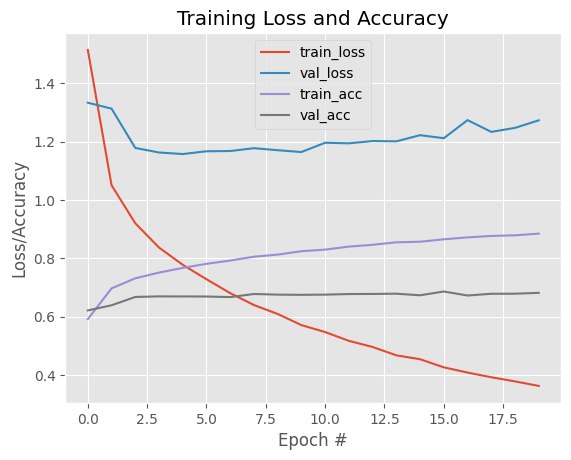

In [ ]:
base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(100, activation='softmax'))

pre_trained_model.summary()

model = pre_trained_model

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
    )

data_aug_factor = 1

# Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128)

A 4% improvement is achieved, from 67% to 71% in accuracy. In addition to better control overfitting. We have also used batch normalization in Top Model in order to have a more stable model.

### **5.3 Data augmentation with two synthetic samples for each real sample**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               8389120   
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 15479972 (59.05 MB)
Trainable params: 8441444 (32.20 MB)
Non-trainable params: 7038528 (26.85 MB)
________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 55s 674ms/step
               precision    recall  f1-score   support

        apple       0.93      0.86      0.90       100
aquarium_fish       0.83      0.79      0.81       100
         baby       0.65      0.59      0.62       100
         bear       0.57      0.68      0.62       100
       beaver       0.61      0.43      0.50       100
          bed       0.78      0.62      0.69       100
          bee       0.68      0.81      0.74       100
       beetle       0.72      0.79      0.75       100
      bicycle       0.93      0.78      0.85       100
       bottle       0.85      0.88      0.86       100
         bowl       0.63      0.64      0.63       100
          boy       0.57      0.35      0.43       100
       bridge       0.74      0.76      0.75       100
          bus       0.69      0.61      0.65       100
    butterfly       0.55      0.72      0.63       100
        camel       0.72      0.

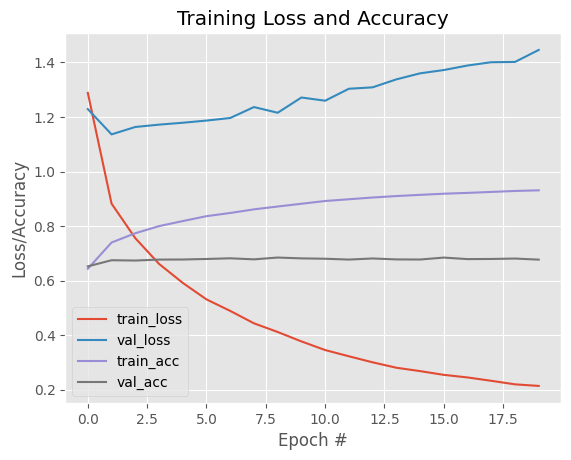

In [ ]:
from tensorflow.keras.applications import DenseNet121
# We reload the base_model
base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))

base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(100, activation='softmax'))

pre_trained_model.summary()

model = pre_trained_model

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
    )

data_aug_factor = 2

# Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128)

#### In this case 2 synthetic samples are applied and we see how the accuracy remains at 71% as in the previous example. However, a higher overfitting is observed and it is also much more expensive to run.

### **5.4 Data Augmentation without batch normalization**

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               8389120   
                                                                 
 dense_11 (Dense)            (None, 100)               51300     
                                                                 
Total params: 15477924 (59.04 MB)
Trainable params: 8440420 (32.20 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
Model: "sequential_2"
_____________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 60s 744ms/step
               precision    recall  f1-score   support

        apple       0.92      0.83      0.87       100
aquarium_fish       0.84      0.75      0.79       100
         baby       0.63      0.57      0.60       100
         bear       0.60      0.58      0.59       100
       beaver       0.62      0.50      0.55       100
          bed       0.62      0.77      0.68       100
          bee       0.73      0.80      0.77       100
       beetle       0.67      0.66      0.66       100
      bicycle       0.80      0.89      0.84       100
       bottle       0.89      0.85      0.87       100
         bowl       0.59      0.60      0.60       100
          boy       0.56      0.42      0.48       100
       bridge       0.78      0.68      0.73       100
          bus       0.58      0.70      0.63       100
    butterfly       0.74      0.63      0.68       100
        camel       0.67      0.

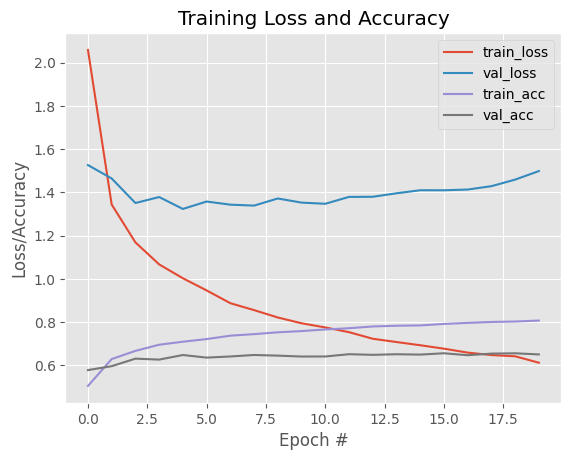

In [ ]:
from tensorflow.keras.applications import DenseNet121
# We reload the base_model
base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(128,128,3))

base_model.trainable = False # Prevent weights from changing in the convolutional part -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

pre_trained_model.summary()

model = pre_trained_model

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
    )

data_aug_factor = 1

# Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128)

#### We see that without batch normalization there is more overfitting and the accuracy drops 2 points.

## **6. ANALYSIS OF THE RESULTS OF EXERCISE 1**

In this first exercise, after using 3 pre-trained networks to carry out the transfer learning, we saw that it was the **DenseNet121** network that provided the best metrics to our dataset. Subsequently, several techniques have been tried, both fine tuning and regularization or change in the structure of the top model without achieving a positive effect on our results.

However, it was by using **Data Augmentation** that we achieved an improvement of our model from 67% accuracy to 71%. Controlling also the overfitting, all this without slowing down the execution of our model.

Finally, we tested changes in the learning rate and batch without success.

We have used the images in 128,128,3 format for optimization, but the pre-trained networks are trained with 224,224,3 images by default. That is why transfer learning was useful, but we did not achieve the best metrics for these networks.

# **Strategy 2: FROM SCRATCH**

## **1. ARCHITECTURE DESIGN**

### **1.1. 1st ARCHITECTURE DESIGN**


FIRST ARCHITECTURE WITH ADAM 0.001 IS CARRIED OUT

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 24ms/step
               precision    recall  f1-score   support

        apple       0.83      0.73      0.78       100
aquarium_fish       0.70      0.65      0.67       100
         baby       0.47      0.40      0.43       100
         bear       0.38      0.14      0.20       100
       beaver       0.39      0.39      0.39       100
          bed       0.60      0.52      0.56       100
          bee       0.57      0.67      0.61       100
       beetle       0.50      0.52      0.51       100
      bicycle       0.58      0.75      0.65       100
       bottle       0.68      0.69      0.69       100
         bowl       0.45      0.30      0.36       100
          boy       0.33      0.29      0.31       100
       bridge       0.60      0.53      0.56       100
          bus       0.52      0.48      0.50       100
    butterfly       0.45      0.50      0.47       100
        camel       0.58      0.51

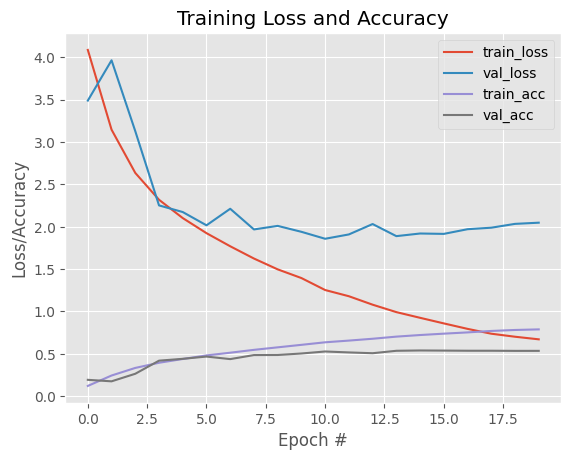

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extracts the characteristics of the images

# We define inputs
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1est set of layers CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 2nd set of layers CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 3rd set of layers CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> responsible for separating between classes, classifying, classifying and

# First (and only) set of layers FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificator softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

# We create the model
model = Model(inputs=inputs, outputs=predictions)

# Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

#### An accuracy of around 55% is achieved, with almost 3 million trainable parameters.

### **1.2 2nd Architecture design**

We put set of layers of 512 neurons.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 3s 41ms/step
               precision    recall  f1-score   support

        apple       0.65      0.85      0.74       100
aquarium_fish       0.62      0.59      0.61       100
         baby       0.35      0.24      0.28       100
         bear       0.26      0.26      0.26       100
       beaver       0.26      0.37      0.31       100
          bed       0.68      0.36      0.47       100
          bee       0.33      0.71      0.45       100
       beetle       0.54      0.43      0.48       100
      bicycle       0.79      0.70      0.74       100
       bottle       0.70      0.69      0.70       100
         bowl       0.39      0.29      0.33       100
          boy       0.31      0.38      0.34       100
       bridge       0.64      0.49      0.55       100
          bus       0.66      0.44      0.53       100
    butterfly       0.45      0.45      0.45       100
        camel       0.52      0.39

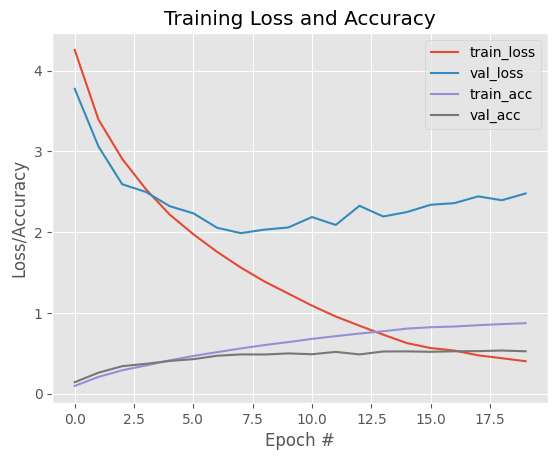

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extracts the characteristics of the images

# We define inputs
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 1est set of layers CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# 2nd set of layers CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 3rd set of layers CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# 4th set of layers CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(512, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(512, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> responsible for separating between classes, classifying, classifying and

# First (and only) set of layers FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificator softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

# We create the model
model = Model(inputs=inputs, outputs=predictions)

# Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

Around 53% is achieved. We can see that even being a more complex architecture with almost 6 million trainable parameters, the model is not improved.

### **1.3. 3rd Architecture design**

We tested an architecture with the sequential api.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 23ms/step
               precision    recall  f1-score   support

        apple       0.80      0.75      0.77       100
aquarium_fish       0.53      0.78      0.63       100
         baby       0.47      0.43      0.45       100
         bear       0.35      0.28      0.31       100
       beaver       0.31      0.36      0.33       100
          bed       0.57      0.55      0.56       100
          bee       0.54      0.68      0.60       100
       beetle       0.61      0.53      0.57       100
      bicycle       0.72      0.71      0.71       100
       bottle       0.76      0.68      0.72       100
         bowl       0.59      0.37      0.45       100
          boy       0.34      0.41      0.37       100
       bridge       0.67      0.58      0.62       100
          bus       0.57      0.55      0.56       100
    butterfly       0.47      0.47      0.47       100
        camel       0.51      0.43

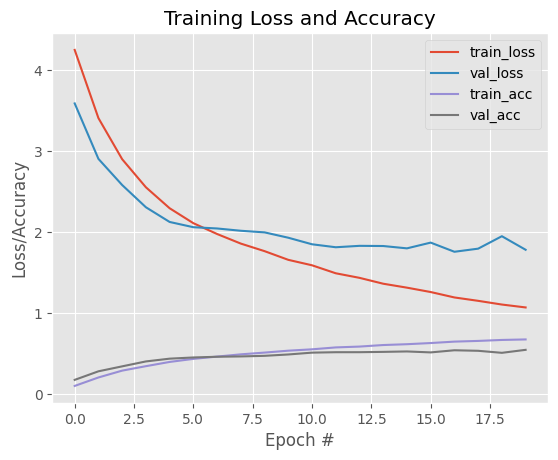

In [ ]:
model = Sequential()

    # First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

    # Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

#### We see that this architecture with only 1.5 million parameters achieves the same accuracy as the first model. It also achieves better control of overfitting. We will keep this architecture to apply other techniques.

## **2. ADJUSTMENT OF THE REGULARIZATION PARAMETERS**

### **2.1. Adjustment Weight regularization**  (without improvement)

#### **2.1.1. Weight regularization L1** (without improvement)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 19ms/step
               precision    recall  f1-score   support

        apple       0.55      0.41      0.47       100
aquarium_fish       0.40      0.10      0.16       100
         baby       0.28      0.18      0.22       100
         bear       0.00      0.00      0.00       100
       beaver       0.06      0.02      0.03       100
          bed       0.31      0.29      0.30       100
          bee       0.28      0.09      0.14       100
       beetle       0.35      0.17      0.23       100
      bicycle       0.53      0.50      0.52       100
       bottle       0.92      0.35      0.51       100
         bowl       0.29      0.35      0.32       100
          boy       0.46      0.06      0.11       100
       bridge       0.32      0.38      0.35       100
          bus       0.47      0.14      0.22       100
    butterfly       0.56      0.05      0.09       100
        camel       0.14      0.08

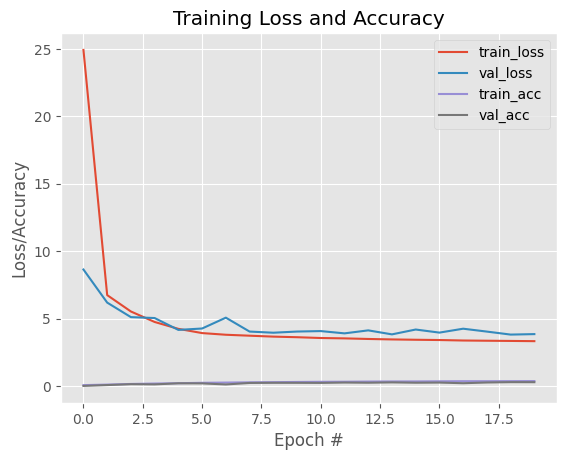

In [ ]:
model = Sequential()

    # First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

    # Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

The model gets much worse.

### **2.2. Adjustment Dropout** (without improvement)

#### **2.2.1. Adjustment Dropout a 0.5** (without improvement)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_32 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_33 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 19ms/step
               precision    recall  f1-score   support

        apple       0.65      0.49      0.56       100
aquarium_fish       0.43      0.27      0.33       100
         baby       0.26      0.12      0.16       100
         bear       0.29      0.07      0.11       100
       beaver       0.14      0.09      0.11       100
          bed       0.33      0.30      0.31       100
          bee       0.31      0.11      0.16       100
       beetle       0.21      0.49      0.30       100
      bicycle       0.33      0.49      0.39       100
       bottle       0.74      0.42      0.54       100
         bowl       0.25      0.15      0.19       100
          boy       0.30      0.15      0.20       100
       bridge       0.55      0.24      0.33       100
          bus       0.40      0.08      0.13       100
    butterfly       0.35      0.08      0.13       100
        camel       0.18      0.05

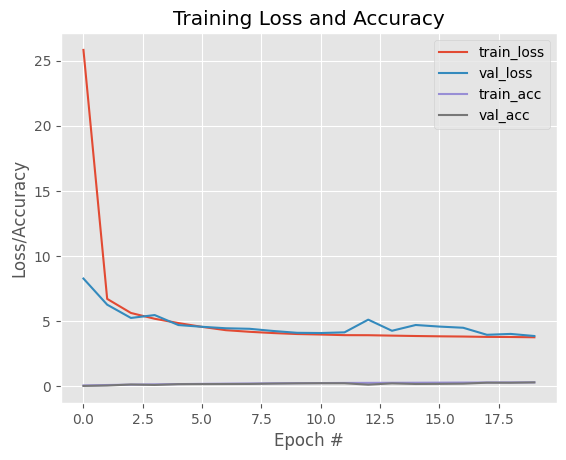

In [ ]:
model = Sequential()

    # First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

    # Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

    # Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

    # Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

We see a clear deterioration of our model.

### **2.3. Set kernel size to 5x5** (no improvement)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_31 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 29ms/step
               precision    recall  f1-score   support

        apple       0.73      0.74      0.73       100
aquarium_fish       0.63      0.58      0.60       100
         baby       0.44      0.36      0.40       100
         bear       0.26      0.24      0.25       100
       beaver       0.33      0.37      0.35       100
          bed       0.44      0.58      0.50       100
          bee       0.69      0.49      0.57       100
       beetle       0.61      0.46      0.52       100
      bicycle       0.72      0.68      0.70       100
       bottle       0.54      0.75      0.63       100
         bowl       0.45      0.23      0.30       100
          boy       0.45      0.25      0.32       100
       bridge       0.52      0.66      0.58       100
          bus       0.49      0.34      0.40       100
    butterfly       0.41      0.52      0.46       100
        camel       0.44      0.47

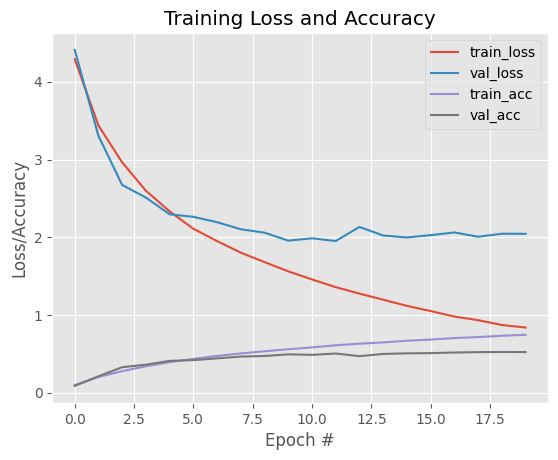

In [ ]:
model = Sequential()

    # First convolutional layer
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convolutional layer
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convolutional layer
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

    # Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.001)

The accuracy worsens by 2 points.

### **2.4. Adjustmen learning rate = 0.0005** (without improvement)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 18ms/step
               precision    recall  f1-score   support

        apple       0.88      0.71      0.78       100
aquarium_fish       0.62      0.67      0.64       100
         baby       0.32      0.47      0.38       100
         bear       0.36      0.17      0.23       100
       beaver       0.31      0.32      0.31       100
          bed       0.51      0.47      0.49       100
          bee       0.55      0.62      0.58       100
       beetle       0.49      0.54      0.51       100
      bicycle       0.60      0.70      0.65       100
       bottle       0.82      0.55      0.66       100
         bowl       0.44      0.43      0.44       100
          boy       0.33      0.35      0.34       100
       bridge       0.72      0.57      0.64       100
          bus       0.62      0.33      0.43       100
    butterfly       0.44      0.44      0.44       100
        camel       0.59      0.33

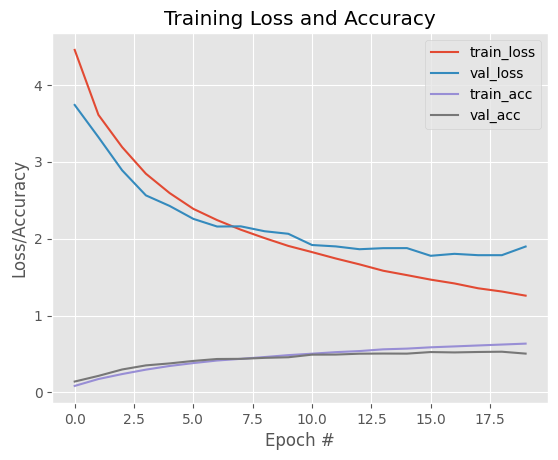

In [ ]:
model = Sequential()

    # First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

    # Training the solution
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER, n_epochs = 20, batch = 128, learn_rate = 0.0005)

## **3. DATA AUGMENTATION** (with improvement)

### **3.1. Creation of 2 samples for each real** (improvement to 57%)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_39 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_40 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 19ms/step
               precision    recall  f1-score   support

        apple       0.81      0.81      0.81       100
aquarium_fish       0.69      0.72      0.71       100
         baby       0.50      0.51      0.50       100
         bear       0.53      0.28      0.37       100
       beaver       0.27      0.35      0.31       100
          bed       0.50      0.70      0.59       100
          bee       0.60      0.71      0.65       100
       beetle       0.58      0.58      0.58       100
      bicycle       0.61      0.80      0.69       100
       bottle       0.84      0.67      0.74       100
         bowl       0.49      0.38      0.43       100
          boy       0.46      0.40      0.43       100
       bridge       0.61      0.69      0.64       100
          bus       0.50      0.50      0.50       100
    butterfly       0.39      0.66      0.49       100
        camel       0.62      0.51

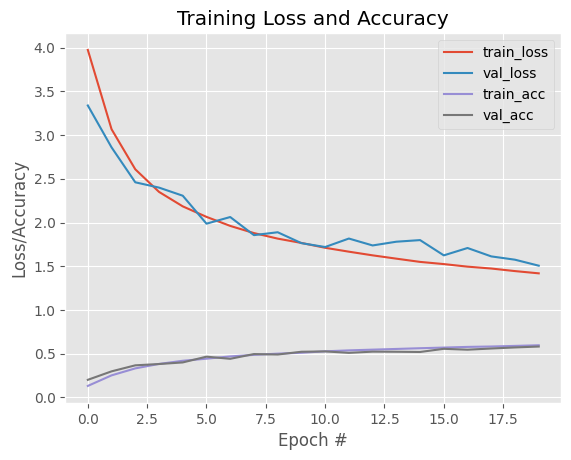

In [ ]:
model = Sequential()

    # First convulotional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convulotional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convulotional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))


train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
    )

data_aug_factor = 2

    # Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128, learn_rate = 0.001)

#### An improvement of 55 to 57% in accuracy and improvement in overfitting is observed.

### **3.2. Creation of 4 samples per each real** (improvement to 60% accuracy)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 19ms/step
               precision    recall  f1-score   support

        apple       0.91      0.77      0.83       100
aquarium_fish       0.81      0.74      0.77       100
         baby       0.65      0.42      0.51       100
         bear       0.36      0.24      0.29       100
       beaver       0.30      0.44      0.35       100
          bed       0.64      0.63      0.64       100
          bee       0.60      0.76      0.67       100
       beetle       0.62      0.75      0.68       100
      bicycle       0.66      0.73      0.70       100
       bottle       0.91      0.64      0.75       100
         bowl       0.61      0.41      0.49       100
          boy       0.47      0.37      0.42       100
       bridge       0.52      0.75      0.62       100
          bus       0.44      0.54      0.48       100
    butterfly       0.44      0.66      0.53       100
        camel       0.51      0.64

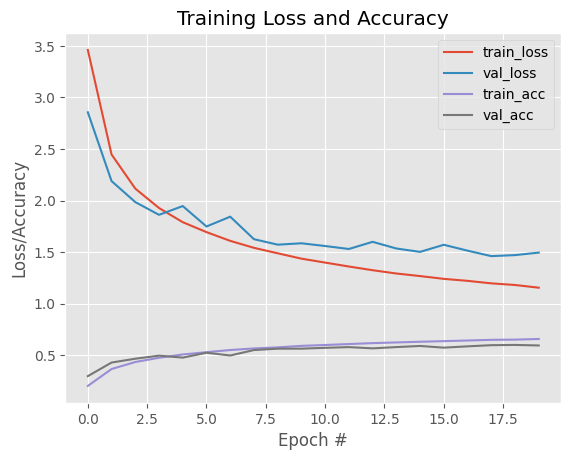

In [ ]:
model = Sequential()

    # First convulotional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convulotional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convulotional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))


train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
    )

data_aug_factor = 4

    # Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128, learn_rate = 0.001)

#### There is a clear improvement from 55 to 60% in accuracy. In addition, overfitting also improves.

### **3.3 Zoom_range = [0.9, 1.25]**(accuracy improved to 61%, but more overfitting)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_26 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 19ms/step
               precision    recall  f1-score   support

        apple       0.84      0.83      0.83       100
aquarium_fish       0.71      0.62      0.66       100
         baby       0.58      0.42      0.49       100
         bear       0.47      0.25      0.33       100
       beaver       0.36      0.37      0.36       100
          bed       0.57      0.74      0.64       100
          bee       0.65      0.74      0.69       100
       beetle       0.63      0.57      0.60       100
      bicycle       0.56      0.80      0.66       100
       bottle       0.79      0.64      0.71       100
         bowl       0.56      0.40      0.47       100
          boy       0.49      0.43      0.46       100
       bridge       0.65      0.78      0.71       100
          bus       0.58      0.49      0.53       100
    butterfly       0.57      0.59      0.58       100
        camel       0.53      0.60

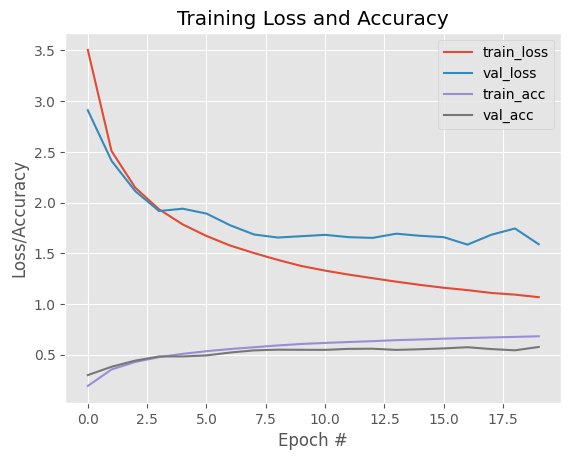

In [ ]:
model = Sequential()

    # First convulotional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Second convulotional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Third convulotional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

    # Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='softmax'))

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2
    )

data_aug_factor = 4

    # Training the solution
train_with_datagen(x_train, y_train, x_test, y_test, model, BASE_FOLDER,  data_aug_factor, train_datagen, n_epochs = 20, batch = 128, learn_rate = 0.001)

#### The zoom is changed to the data Augmentation of 4 synthetic samples achieving a slight increase in accuracy to 61% but worsening the overfitting.

## **4. ANALYSIS OF RESULTS OF EXERCISE 2**

En el ejercicio 2 vemos como una red creada desde cero nos permite jugar con los parámetros más In exercise 2 we see how a network created from scratch allows us to play with the parameters more quickly, because they are less complex networks. But it gives us worse results due to this low complexity.

The best network we created was one capable of reaching 55% accuracy with 20 epochs. We can affirm that by carrying out **Data Augmentation** techniques we have managed to increase the accuracy in 6 points up to 61%. On the other hand, the second best technique used was to change the learning rate to 0.001. The rest of the techniques used have not brought us any benefits.

# **FINAL CONCLUSIONS**

In conclusion, we can say that pre-trained networks are a very powerful tool for studying image datasets such as ours. Since they have achieved better metrics than a network created from 0. However, regarding our dataset we can say that:

- It probably does not resemble too closely the imagenet image dataset with which these networks are trained. Because we did not achieve accuracys close to their TOP 1.
- It is a set of images with little diversity or with little quantity of images, due to the large number of classes (100). Therefore we see how it improves when doing data augmentation.
- Our models could improve with more epochs, but due to time and resource issues, we have not been able to train more than 20.
- The more complex the model, the better our model will work. Seen when creating our network from scratch.